# Correlation between fuel prices and freight transport

Project group 9

Thijn Schoonderbeek - 6090133
Jim van Erp - 5083540
Fos van der Meer - 4866436

Github: 

## 1.Introduction
Gas prices have been a highly controversial topic since the Covid-19 crisis of 2020 and the start of the Russia-Ukraine war in Februari 2022 as gas is the main fuel for the transportation sector. The costs of the transportation sector can be split in fixed costs and variable costs, where fuel prices are the most important part of the variable costs. It is therefore interesting to see the correlation between the price of gas and the use of various modes of transportation. Trains, ships and trucks are the main modes for the transportation of goods as their efficiency over long distances with high loads is relatively low. 

### Sub-questions
To answer our main research question and to support statements made in the introduction, a few sub questions have been created.

1. How have the prices of fuels developed over the years?
2. To what extent does the ratio of truck to rail transport change?
3. How much time does it take to see an effect of a change in price on rail and truck transport?


## 2. Analysis 

### 2.1 Fuel prices

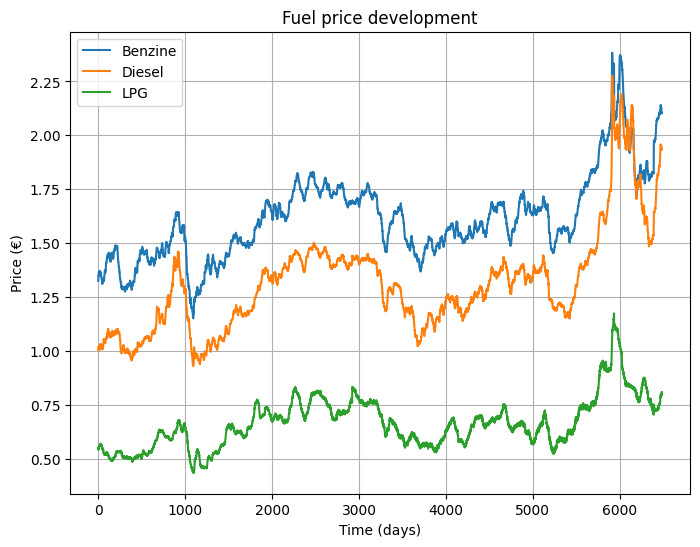

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
fuel = pd.read_csv("data/fuel.csv", sep=";")[:-1]

# Replace commas with periods in specific columns
fuel[["Benzine", "Diesel", "LPG"]] = fuel[["Benzine", "Diesel", "LPG"]].apply(lambda x: x.str.replace(',', '.', regex=False))

# Convert the selected columns to float
fuel[["Benzine", "Diesel", "LPG"]] = fuel[["Benzine", "Diesel", "LPG"]].apply(pd.to_numeric)

dates = [date.split(sep= " ") for date in fuel["Perioden"]]
fuel["Jaar"] = [int(date[0]) for date in dates]

dct = {"januari": 1, "februari": 2, "maart": 3, "april": 4, "mei": 5, "juni": 6,\
        "juli":7, "augustus": 8, "september":9, "oktober":10, "november":11, "december":12}
fuel["Maand"] = [dct[date[-1]] for date in dates]
fuel["Kwartaal"] = [1+(maand-1)//3 for maand in fuel["Maand"]]
fuel.head()

# Input the data to be represented in the graph 
x_data = fuel["Jaar"] + (fuel["Kwartaal"]-1)/4
y1_data = fuel["Benzine"]
y2_data = fuel["Diesel"]
y3_data = fuel["LPG"]

# Provide labels for each of the lines in the graph
plt.figure(figsize=(8, 6))  
plt.plot(y1_data, label='Benzine')  
plt.plot(y2_data, label='Diesel')  
plt.plot(y3_data, label='LPG')  

# Provide a title and axis labels
plt.title('Fuel price development')
plt.xlabel('Time (days)')
plt.ylabel('Price (€)')
plt.legend()

# Show the plot with grid lines
plt.grid(True)  
plt.show()


The dataset can be found at: https://data.overheid.nl/dataset/532-pompprijzen-motorbrandstoffen--brandstofsoort--per-dag#panel-description

This dataset gives us fuel prices of the three most common combustible fuels on a daily basis, going back to January 1 2006. Later on we will only consider Diesel prices, and take the average price per quarter.

A multiple line graph was generated to depict the trend in fuel prices over the years. The graph illustrates a gradual increase in the mean fuel prices, punctuated by four instances of abrupt declines. Remarkably, the cumulative prices of both gasoline (benzine) and diesel nearly doubled throughout the observed period. You can also see that the prices are related to each other, and they increase or decrease at the same rate.

### 2.2 Ratio of truck to rail transport

C:\Users\Fos van der Meer\AppData\Local\Temp\ipykernel_28856\3214958166.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rail = rail.applymap(lambda x: str(x).replace("*", ""))


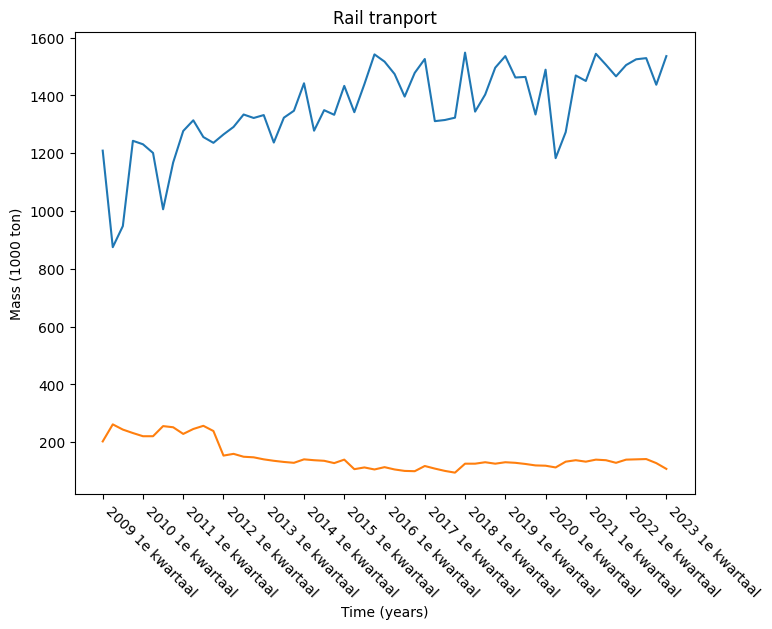

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Last row deleted because of incomplete data for that quarter
rail = pd.read_csv("data/rail.csv", sep=";")[:-1]     
rail = rail.replace(',','.', regex = True)

# Rename some of the columns as their name is unconveniently long
rail.rename(columns={
    "Ladingtonkilometer/Binnenlands goederenvervoer (mln tonkm)": "Binnenlands vervoer (mln tonkm)",
    "Ladingtonkilometer/Internationaal goederenvervoer/Aan- en afvoer/Totaal aan- en afvoer (mln tonkm)": "Aan- en afvoer internationaal (mln tonkm)"
}, inplace=True)

# Delete asterisks from the dataset
rail = rail.applymap(lambda x: str(x).replace("*", ""))

# Input the data to be represented in the graph 
dates = rail['Perioden']
values1 = rail['Aan- en afvoer internationaal (mln tonkm)'].map(lambda x: float(x))
values2 = rail['Binnenlands vervoer (mln tonkm)'].map(lambda x: float(x))
plt.figure(figsize=(8,6))

# Provide a title and axis labels
plt.title('Rail tranport')
plt.xlabel('Time (years)')
plt.ylabel('Mass (1000 ton)')

# Show the graph and its characteristics
plt.plot(dates, values1)
plt.plot(dates, values2)
plt.xticks(dates[::4], rotation=-45, ha="left")
plt.show()

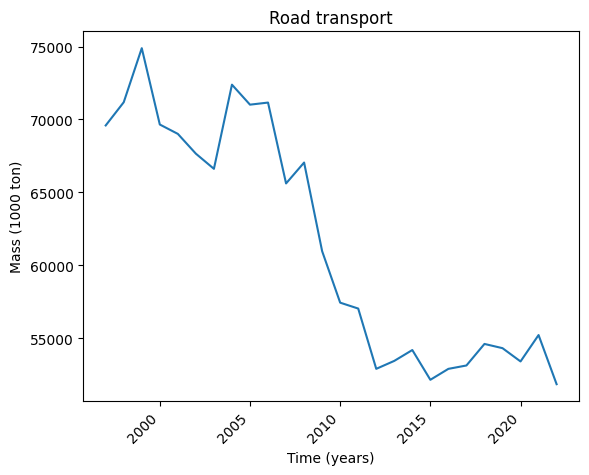

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

road = pd.read_csv("data/road.csv", sep=";")
road = road.replace(',','.', regex = True)

# Delete asterisks from the dataset
road["Perioden"] = road["Perioden"].map(lambda x : int(x.replace("*", "")))

# Bundle the data categories
transport = road[(road["Beroeps- en eigen vervoer"]=="Beroepsvervoer") & (road["Vervoerstromen"] == "Binnenlands en bilateraal vervoer")]

# Provide a title and axis labels
plt.title('Road transport')
plt.xlabel('Time (years)')
plt.ylabel('Mass (1000 ton)')

# Input the data to be represented in the graph 
plt.plot(transport["Perioden"], transport["Ladingtonkilometers (x mln)"])
plt.xticks(rotation=45, ha="right")
plt.show()

It becomes apparent from the graphs on road and rail transport that road transport has decreased by roughly 20 percent over the last two decades while rail transport has increased by about 15 percent over the same time period. 
	The amount of load for both transport modes seems to be very vulnerable to external factors and therefore changes a lot from year to year. The exact ratio therefore varies a lot from year to year but the ratio of rail to road transport has overall increased.  


## 3


In [12]:
print(value.head())
print(transport[["Perioden", "Ladingtonkilometers (x mln)"]].head())

0    1209.0
1     875.0
2     948.0
3    1243.0
4    1231.0
Name: Aan- en afvoer internationaal (mln tonkm), dtype: float64
     Perioden  Ladingtonkilometers (x mln)
208      1997                        69589
209      1998                        71180
210      1999                        74885
211      2000                        69653
212      2001                        69011


## 4 Conclusion

Fuel prices have nearly doubled on the last two decades, increasing the variable costs of transport of goods by a large margin. This research looked into the correlation between the this increase in fuel prices and the change of freight transport with various tranport modes. 
   
Rail transport is generally speaking more fuel efficient than road transport, through lower friction and higher volume of goods. There are many more factors that influence the demand and supply for goods, hence a direct causation can not be made. However, it is concluded that rail transport has increased and road transport increased, while fuel prices increased. 

The correlation between fuel prices and rail transport is thus positive and the correlation between fuel prices and road transport is negative.